- LAB --- EMMANUEL ARAOYINBO 
 - ID     W0852664
 - DAB 303 - MARKETING ANALYTICS
 

 - Churn Analysis 

The purpose of the lab is to perform analysis of the customer base of an e-commerce site, determine the characteristics of the individuals who have stopped using the service (known as “customer churn”), and devise strategies to target similar individuals within the dataset and prevent them from changing.

1.	Download the dataset from Blackboard.  The .csv file contains the dataset.  There is also a .xlsx file containing the data dictionary, with descriptions of what each column entails
2.	Using Python tools, import the dataset as a Pandas Dataframe and perform analysis to determine the customer churn characteristics.  Your analysis should include cleaning the data (as needed), X-Y Scatter plots on appropriate variable pairs, and correlation testing.  
a.	You are also permitted to use additional techniques which may not be listed, provided that you can submit a rationale for why the technique is useful and an indication of what you hope to achieve.
3.	Perform decision tree and logistics regression models.
a.	When splitting the data into train and test data, use test_size = 0.20. 
4.	In a Presentation document, record your observations with respect to the customers who have already churned, and use it to identify the groups of people most likely to churn next.  Devise a high-level marketing strategy to entice these individuals to continue using the service.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data = pd.read_csv('E-Commerce Churn Data.csv') # IMPORTING DATA

In [3]:
data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [4]:
#CHECKING THE DESCRIPTION OF THE DATASET
pd.options.display.float_format = '{:20,.2f}'.format
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,"5,630.00","52,815.50","1,625.39","50,001.00","51,408.25","52,815.50","54,222.75","55,630.00"
Churn,"5,630.00",0.17,0.37,0.00,0.00,0.00,0.00,1.00
Tenure,"5,366.00",10.19,8.56,0.00,2.00,9.00,16.00,61.00
CityTier,"5,630.00",1.65,0.92,1.00,1.00,1.00,3.00,3.00
WarehouseToHome,"5,379.00",15.64,8.53,5.00,9.00,14.00,20.00,127.00
HourSpendOnApp,"5,375.00",2.93,0.72,0.00,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,"5,630.00",3.69,1.02,1.00,3.00,4.00,4.00,6.00
SatisfactionScore,"5,630.00",3.07,1.38,1.00,2.00,3.00,4.00,5.00
NumberOfAddress,"5,630.00",4.21,2.58,1.00,2.00,3.00,6.00,22.00
Complain,"5,630.00",0.28,0.45,0.00,0.00,0.00,1.00,1.00


In [5]:
#CHECKING COLUMN NAME
data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [6]:
#CHECKING THE SHAPE OF OUR DATASET
data.shape

(5630, 20)

In [7]:
#CHECKING THE DATASET INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [8]:
#Detectung missing values
data.isnull().any()

CustomerID                     False
Churn                          False
Tenure                          True
PreferredLoginDevice           False
CityTier                       False
WarehouseToHome                 True
PreferredPaymentMode           False
Gender                         False
HourSpendOnApp                  True
NumberOfDeviceRegistered       False
PreferedOrderCat               False
SatisfactionScore              False
MaritalStatus                  False
NumberOfAddress                False
Complain                       False
OrderAmountHikeFromlastYear     True
CouponUsed                      True
OrderCount                      True
DaySinceLastOrder               True
CashbackAmount                 False
dtype: bool

In [9]:
#counting the missing values
data.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

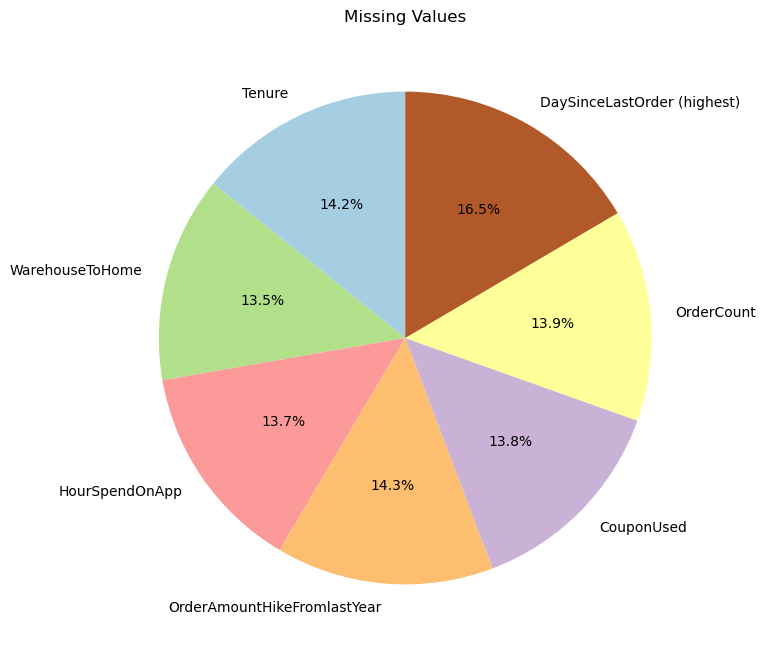

In [10]:
missing_values = data.isna().sum()
missing_values = missing_values[missing_values > 0]
max_missing = missing_values.idxmax()
labels = [f"{col} (highest)" if col == max_missing else col for col in missing_values.index]
colors = plt.cm.Paired(np.linspace(0, 1, len(missing_values)))

plt.figure(figsize=(8, 8))
plt.pie(missing_values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Missing Values")
plt.ylabel('')
plt.show()

In [11]:
#total number of missing values in our dataset
data.isna().sum().sum()

1856

In [12]:
# DATA CLEARNING
# CHECK FOR MISSING VALUES IN THE DATASET 
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data[missing_data > 0])

Missing Data:
 Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64


In [13]:
# HANDLE MISSING DATA BY IMPUTING MISSING VALUES(MEAN FOR NUMERICAL, MODE FOR CATEGORICAL)
data['Tenure'].fillna(data['Tenure'].mean(), inplace=True)
data['WarehouseToHome'].fillna(data['WarehouseToHome'].mean(), inplace=True)
data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].mean(), inplace=True)
data['OrderAmountHikeFromlastYear'].fillna(data['OrderAmountHikeFromlastYear'].mean(), inplace=True)
data['CouponUsed'].fillna(data['CouponUsed'].mode()[0], inplace=True)
data['OrderCount'].fillna(data['OrderCount'].mean(), inplace=True)
data['DaySinceLastOrder'].fillna(data['DaySinceLastOrder'].mean(), inplace=True)


In [14]:
#creating a function to display the data type, percentage of missing values and number of unique values per column
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [15]:
sniff_modified(data)

,data type,percent missing,No. unique,unique values
CustomerID,int64,0.00,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
Complain,int64,0.00,2,"[1, 0]"
NumberOfAddress,int64,0.00,15,"[9, 7, 6, 8, 3, 2, 4, 10, 1, 5, 19, 21, 11, 20..."
SatisfactionScore,int64,0.00,5,"[2, 3, 5, 4, 1]"
NumberOfDeviceRegistered,int64,0.00,6,"[3, 4, 5, 2, 1, 6]"
Churn,int64,0.00,2,"[1, 0]"
CityTier,int64,0.00,3,"[3, 1, 2]"
CashbackAmount,int64,0.00,220,"[160, 121, 120, 134, 130, 139, 123, 127, 295, ..."
WarehouseToHome,float64,0.00,35,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
HourSpendOnApp,float64,0.00,7,"[3.0, 2.0, 2.9315348837209303, 1.0, 0.0, 4.0, ..."


In [16]:
#creating a function to find the columns with missing values, extract the number and percentage of these missing values in relation to the dataset
def FindMissingColsPercentage(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        # mean = sum / total
        pct = df[col].isnull().mean() * 100 
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
        total += missing_vals
    
    if total == 0:
        print("no missing values")

In [17]:
FindMissingColsPercentage(data)

no missing values


In [18]:
# VERIFY THAT MISSING VALUES HAVE BEEN HANDLED
missing_data = data.isnull().sum()
print("Missing Data after Handling:\n", missing_data[missing_data > 0])

Missing Data after Handling:
 Series([], dtype: int64)


In [19]:
#replacing all empty spaces with np.NaN
data_clean = data.replace(" ", np.NaN)

In [20]:
# replacing all missing values(NaN) in the dataset with 0
data_clean = data_clean.fillna(0)

In [21]:
#checking dataset information after replacing the missing values
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [22]:
data_clean.isnull().any()

CustomerID                     False
Churn                          False
Tenure                         False
PreferredLoginDevice           False
CityTier                       False
WarehouseToHome                False
PreferredPaymentMode           False
Gender                         False
HourSpendOnApp                 False
NumberOfDeviceRegistered       False
PreferedOrderCat               False
SatisfactionScore              False
MaritalStatus                  False
NumberOfAddress                False
Complain                       False
OrderAmountHikeFromlastYear    False
CouponUsed                     False
OrderCount                     False
DaySinceLastOrder              False
CashbackAmount                 False
dtype: bool

In [23]:
FindMissingColsPercentage(data_clean)

no missing values


In [24]:
#viewing the object data type columns
data_clean[['PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'PreferredLoginDevice', 'MaritalStatus']]

,PreferredPaymentMode,Gender,PreferedOrderCat,PreferredLoginDevice,MaritalStatus
0,Debit Card,Female,Laptop & Accessory,Mobile Phone,Single
1,UPI,Male,Mobile,Phone,Single
2,Debit Card,Male,Mobile,Phone,Single
3,Debit Card,Male,Laptop & Accessory,Phone,Single
4,CC,Male,Mobile,Phone,Single
...,...,...,...,...,...
5625,Credit Card,Male,Laptop & Accessory,Computer,Married
5626,Credit Card,Male,Fashion,Mobile Phone,Married
5627,Debit Card,Male,Laptop & Accessory,Mobile Phone,Married
5628,Credit Card,Male,Laptop & Accessory,Computer,Married


In [25]:
#checking the unique values in these columns
obj = ['PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'PreferredLoginDevice', 'MaritalStatus']  #creating a list to the column names

for i in obj: #creating a for loop to print out the column name and unique values and count
    #print(i, ecd_clean[i].nunique(), '\n',ecd_clean[i].unique())
    print(data_clean[i].value_counts(),'\n')

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64 

Gender
Male      3384
Female    2246
Name: count, dtype: int64 

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64 

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64 

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64 



Following a review of the unique values in the aforementioned columns, we have made the following assumptions:

- In the **PreferredPaymentMode** column, the abbreviations 'CC' and 'COD' are equivalent to 'Credit Card' and 'Cash on Delivery', respectively.
- In the **PreferredLoginDevice** column, 'Mobile Phone' and 'Phone' refer to the same type of device.
- In the **PreferedOrderCat** column, 'Mobile Phone' and 'Mobile' denote the same category.

Based on these observations, we will proceed with the following data cleaning steps:

- Replace 'CC' with 'Credit Card'
- Replace 'COD' with 'Cash on Delivery'
- Replace 'Phone' with 'Mobile Phone'
- Replace 'Mobile' with 'Mobile Phone'

In [26]:
#replacing the data entries that has the same meaning
data_clean['PreferredPaymentMode'] = data_clean['PreferredPaymentMode'].replace('CC', 'Credit Card')
data_clean['PreferredPaymentMode'] = data_clean['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')
data_clean['PreferedOrderCat'] = data_clean['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
data_clean['PreferredLoginDevice'] = data_clean['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

In [27]:
#cross-checking the replacement has been effected
for i in obj: #creating a for loop to print out the column name and unique values and count
    print(data_clean[i].value_counts(),'\n')

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64 

Gender
Male      3384
Female    2246
Name: count, dtype: int64 

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64 

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64 

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64 



In [28]:
#creating categories from tenure column into a new column - tenuregroup
ranges = [0,10,20,30,40,50,60,np.inf] #list to hold the bin ranges
group_names = ['0-10 years', '11-20 years', '21-30 years', '31-40 years', '41-50 years', '51-60 years', '61 years & above'] # list to hold the labels
data_clean['TenureGroup'] = pd.cut(data_clean['Tenure'], bins = ranges, labels = group_names, include_lowest = True)
data_clean[['Tenure', 'TenureGroup']]

,Tenure,TenureGroup
0,4.00,0-10 years
1,10.19,11-20 years
2,10.19,11-20 years
3,0.00,0-10 years
4,0.00,0-10 years
...,...,...
5625,10.00,0-10 years
5626,13.00,11-20 years
5627,1.00,0-10 years
5628,23.00,21-30 years


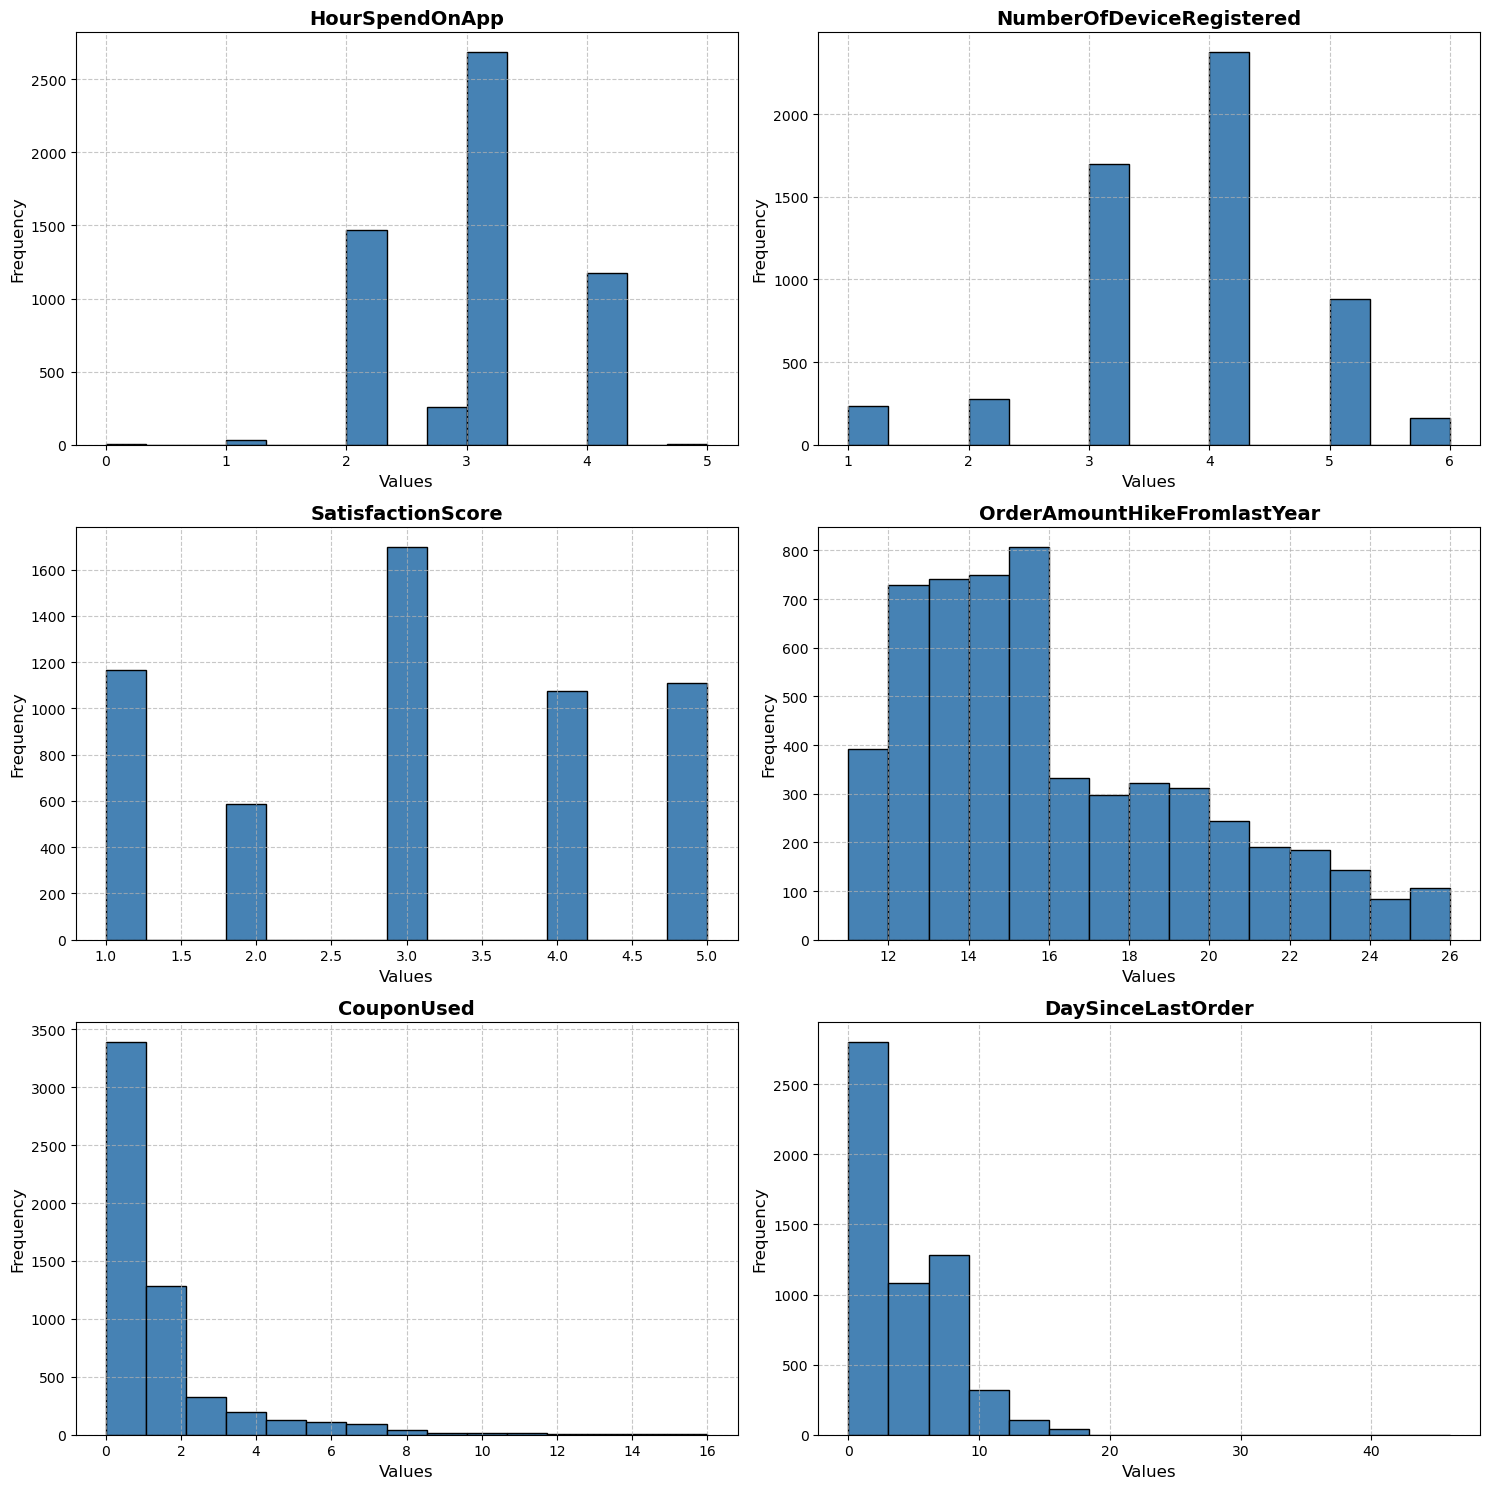

In [30]:
# Plotting graphs for better understanding of data distribution
cols = ['HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
        'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for col, ax in zip(cols, axes.flatten()):
    data[col].plot(kind='hist', ax=ax, color='#4682B4', edgecolor='black', bins=15)  # Blue color
    ax.set_title(col, fontsize=14, fontweight='bold')
    ax.set_xlabel('Values', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

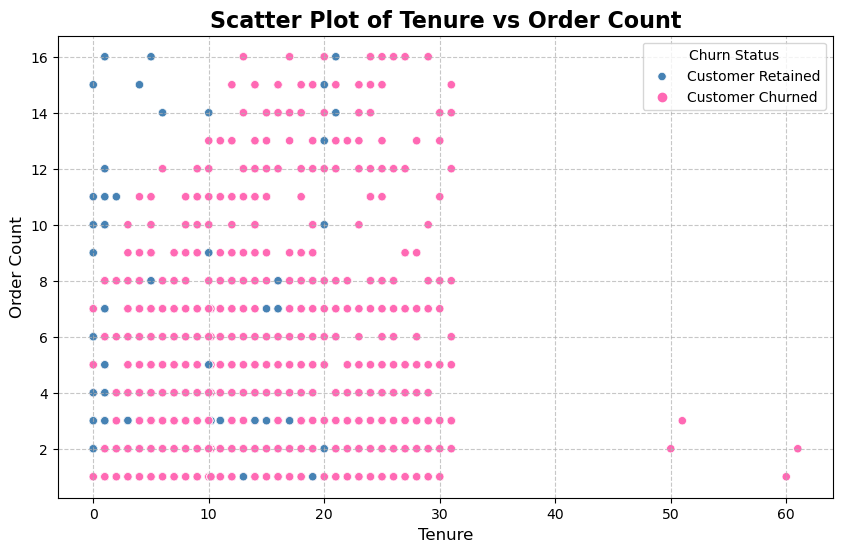

In [31]:
 # SCATTER PLOTS OF RELEVANT FEATURES
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='OrderCount', hue='Churn', data=data, palette={0: '#FF69B4', 1: '#4682B4'})  # Blue for Retained, Pink for Churned

plt.title('Scatter Plot of Tenure vs Order Count', fontsize=16, fontweight='bold')
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.legend(title='Churn Status', labels=['Customer Retained', 'Customer Churned'])
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


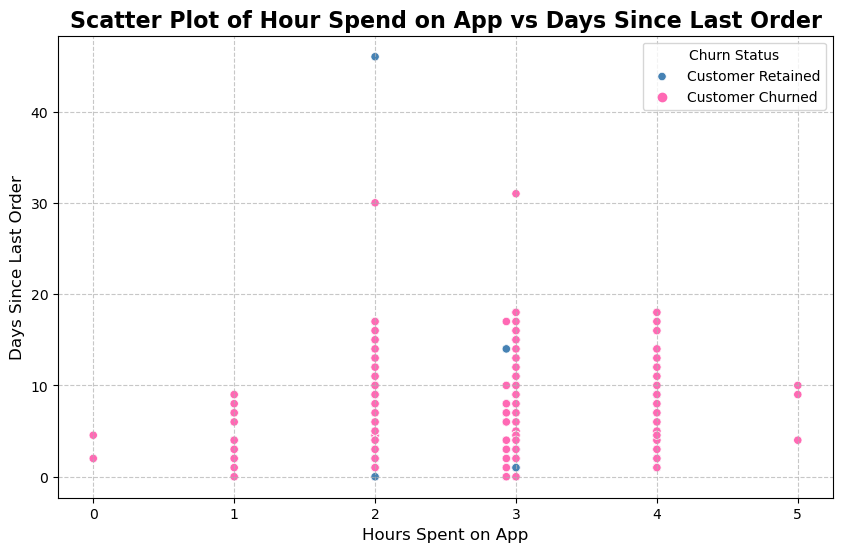

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HourSpendOnApp', y='DaySinceLastOrder', hue='Churn', data=data, 
                palette={0: '#FF69B4', 1: '#4682B4'})  # Blue for Retained, Pink for Churned

plt.title('Scatter Plot of Hour Spend on App vs Days Since Last Order', fontsize=16, fontweight='bold')
plt.xlabel('Hours Spent on App', fontsize=12)
plt.ylabel('Days Since Last Order', fontsize=12)
plt.legend(title='Churn Status', labels=['Customer Retained', 'Customer Churned'])
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

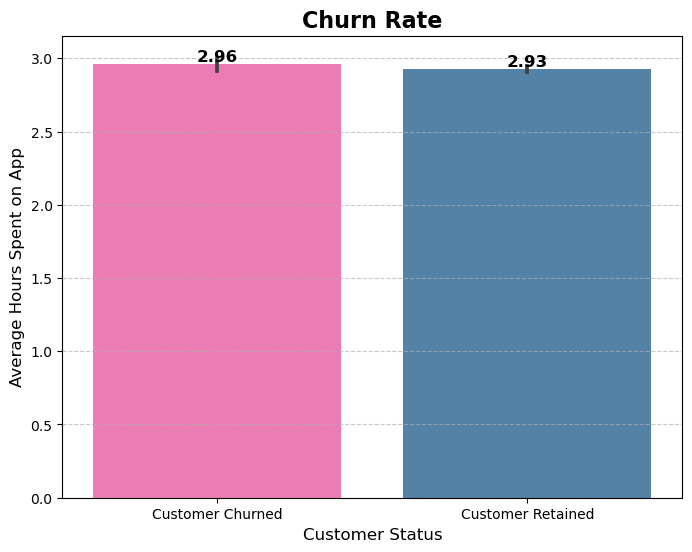

In [33]:
data_cleaned = data.copy()
data_cleaned['Churn'] = data_cleaned['Churn'].replace({0: "Customer Retained", 1: "Customer Churned"})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Churn', y='HourSpendOnApp', data=data_cleaned, palette=['#FF69B4', '#4682B4'])

plt.title("Churn Rate", fontsize=16, fontweight='bold')
plt.xlabel("Customer Status", fontsize=12)
plt.ylabel("Average Hours Spent on App", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

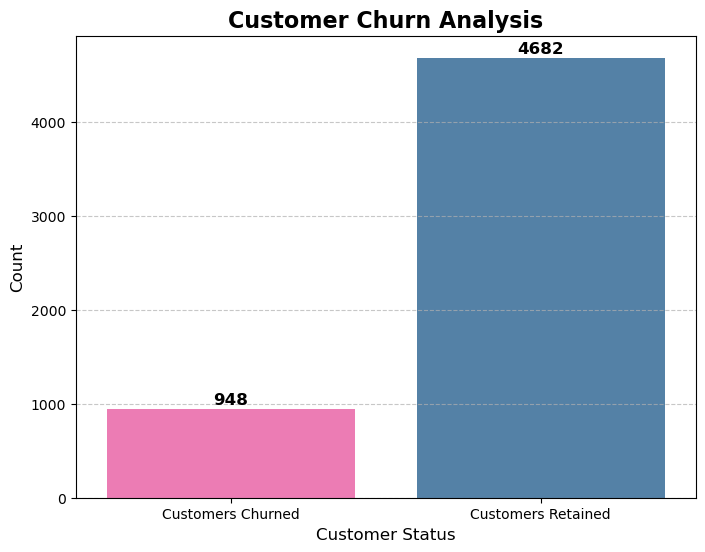

In [34]:
Cust_Churn_Count = (data['Churn'] == 1).sum()
Cust_Retained_count = (data['Churn'] == 0).sum()

df = pd.DataFrame({'Customer Status': ['Customers Churned', 'Customers Retained'],
                   'Count': [Cust_Churn_Count, Cust_Retained_count]})

plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Status', y='Count', data=df, palette=['#FF69B4', '#4682B4'])  # Pink & Blue

plt.title('Customer Churn Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Customer Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(df['Count']):
    plt.text(index, value + 50, f'{value}', ha='center', fontsize=12, fontweight='bold')

plt.show()

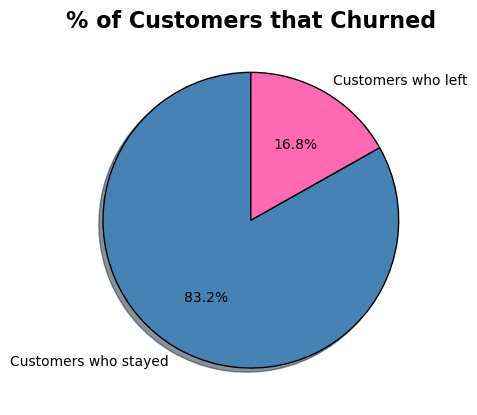

In [35]:
data['Churn'].value_counts().plot.pie(labels=['Customers who stayed', 'Customers who left'],
                                      autopct='%1.1f%%', shadow=True, 
                                      colors=['#4682B4', '#FF69B4'],  # Blue & Pink
                                      startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("% of Customers that Churned", fontsize=16, fontweight='bold')
plt.ylabel('')  # Hide y-label for better aesthetics
plt.show()

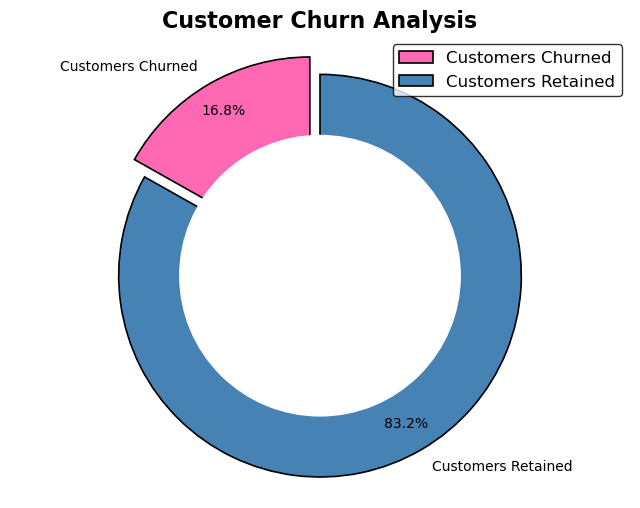

In [36]:
Cust_Churn_Count = (data['Churn'] == 1).sum()
Cust_Retained_count = (data['Churn'] == 0).sum()

labels = ['Customers Churned', 'Customers Retained']
sizes = [Cust_Churn_Count, Cust_Retained_count]

colors_given = ['#FF69B4', '#4682B4'] 
explode = (0.1, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}, colors=colors_given, explode=explode, pctdistance=0.85)

plt.title('Customer Churn Analysis', fontsize=16, fontweight='bold')

centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.legend(labels, loc="upper right", edgecolor='black', fontsize=12)
plt.axis('equal')

plt.show()

In [37]:
#checking out churn rate by gender distribution using a pivot table 
data_clean.pivot_table(values="Tenure", index="Gender", columns="Churn",
                      aggfunc='sum')

Churn,0,1
Gender,,
Female,"22,693.72","1,251.70"
Male,"30,920.03","2,503.68"


<Figure size 800x500 with 0 Axes>

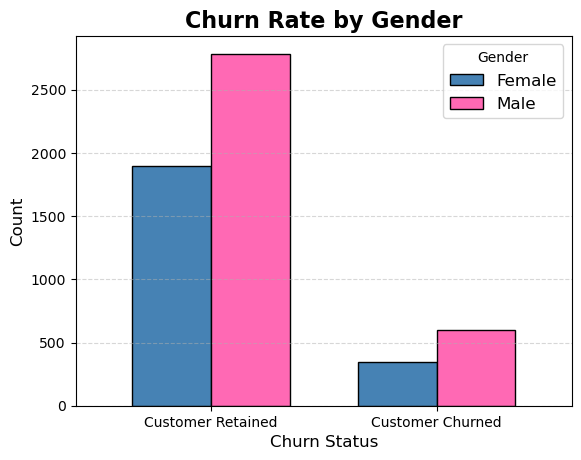

In [38]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['Churn', 'Gender'], inplace=True)

churn_gender_counts = data.groupby(['Churn', 'Gender']).size().unstack()

plt.figure(figsize=(8, 5))
churn_gender_counts.plot(kind='bar', color=['#4682B4', '#FF69B4'], edgecolor='black', width=0.7)

plt.title("Churn Rate by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Customer Retained', 'Customer Churned'], rotation=0)

plt.legend(title='Gender', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

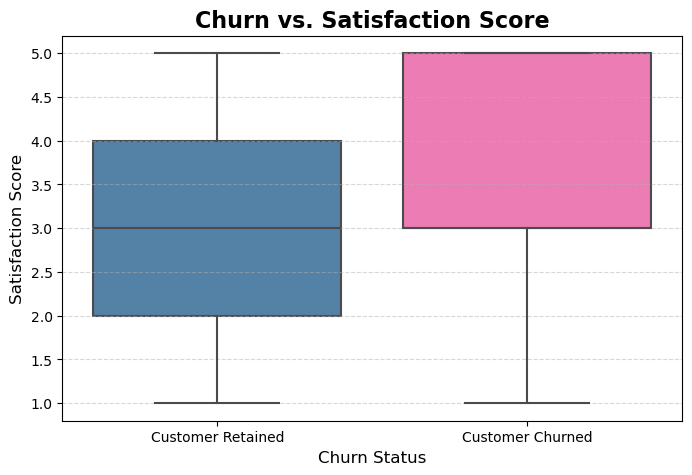

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='SatisfactionScore', data=data, palette=['#4682B4', '#FF69B4'])

plt.title("Churn vs. Satisfaction Score", fontsize=16, fontweight='bold')
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Satisfaction Score", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Customer Retained', 'Customer Churned'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<Figure size 800x500 with 0 Axes>

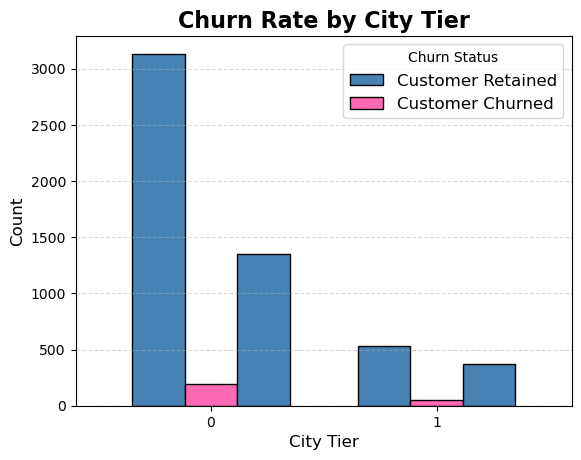

In [40]:
churn_city_counts = data.groupby(['Churn', 'CityTier']).size().unstack()

plt.figure(figsize=(8, 5))
churn_city_counts.plot(kind='bar', color=['#4682B4', '#FF69B4'], edgecolor='black', width=0.7)

plt.title("Churn Rate by City Tier", fontsize=16, fontweight='bold')
plt.xlabel("City Tier", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn Status', labels=['Customer Retained', 'Customer Churned'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

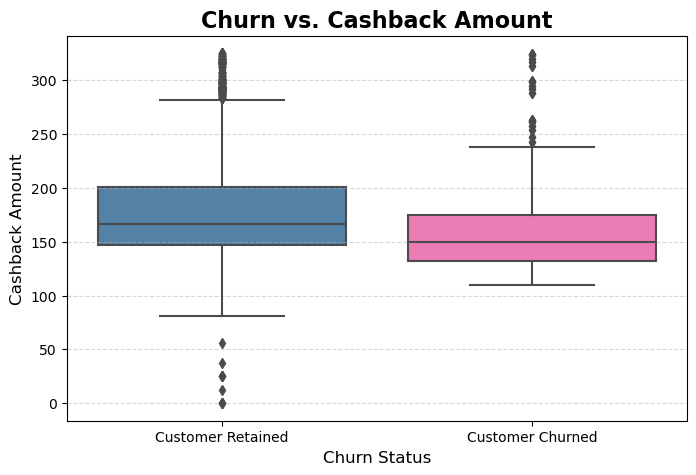

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='CashbackAmount', data=data, palette=['#4682B4', '#FF69B4'])

plt.title("Churn vs. Cashback Amount", fontsize=16, fontweight='bold')
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Cashback Amount", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Customer Retained', 'Customer Churned'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<Figure size 1200x600 with 0 Axes>

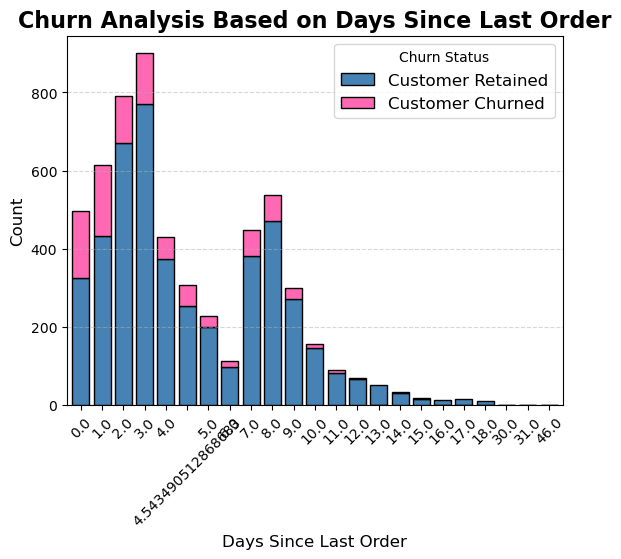

In [72]:
churn_days_counts = data.groupby(['DaySinceLastOrder', 'Churn']).size().unstack()

plt.figure(figsize=(12, 6))
churn_days_counts.plot(kind='bar', stacked=True, color=['#4682B4', '#FF69B4'], edgecolor='black', width=0.8)

plt.title("Churn Analysis Based on Days Since Last Order", fontsize=16, fontweight='bold')
plt.xlabel("Days Since Last Order", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Churn Status', labels=['Customer Retained', 'Customer Churned'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

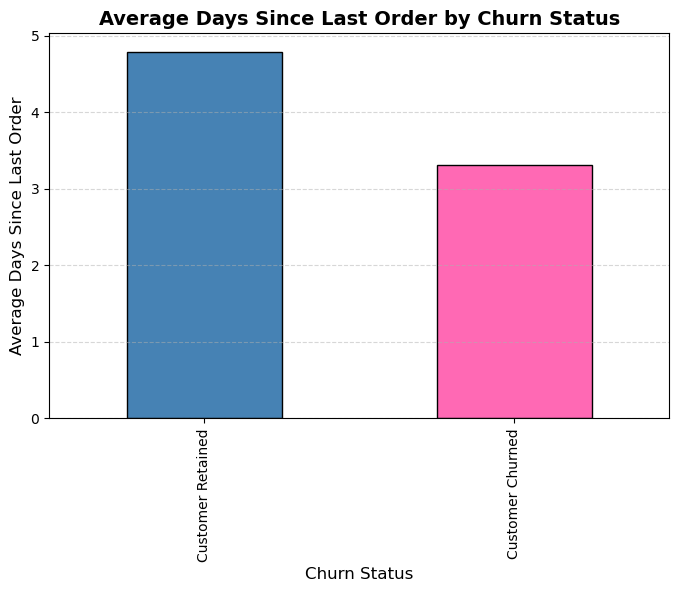

In [43]:
churn_days_avg = data.groupby('Churn')['DaySinceLastOrder'].mean()

plt.figure(figsize=(8, 5))
churn_days_avg.plot(kind='bar', color=['#4682B4', '#FF69B4'], edgecolor='black')

plt.title("Average Days Since Last Order by Churn Status", fontsize=14, fontweight='bold')
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Average Days Since Last Order", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Customer Retained', 'Customer Churned'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

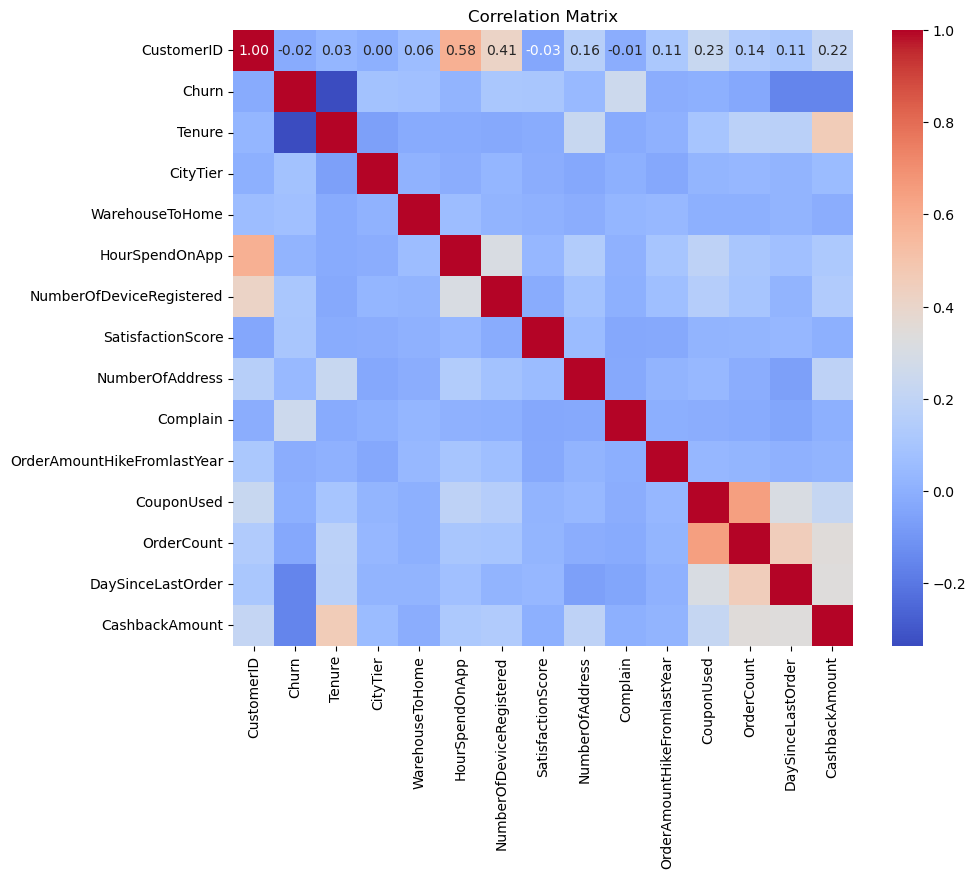

In [73]:
# (EDA) EXPLORATORY DATA ANALYSIS
 # PLOT CORRELATION MATRIX FOR NUMERIC COLUMNS ONLY
numeric_data = data.select_dtypes(include=[np.number])  #SELECT ONLY NUMERIC COLUMNS
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [44]:
bins = [0, 10, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-10 years', '11-20 years', '21-30 years', '31-40 years', '41-50 years', '51-60 years', '61 years & above']

data['TenureGroup'] = pd.cut(data['Tenure'], bins=bins, labels=labels, right=True)

# Map categorical values to numerical encoding
mapping = {label: i+1 for i, label in enumerate(labels)}
data['TenureGroup'] = data['TenureGroup'].map(mapping)

data.head(10)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureGroup
0,50001,1,4.00,Mobile Phone,3,6.00,Debit Card,Female,3.00,3,...,2,Single,9,1,11.00,1.00,1.00,5.00,160,1
1,50002,1,10.19,Phone,1,8.00,UPI,Male,3.00,4,...,3,Single,7,1,15.00,0.00,1.00,0.00,121,2
2,50003,1,10.19,Phone,1,30.00,Debit Card,Male,2.00,4,...,3,Single,6,1,14.00,0.00,1.00,3.00,120,2
3,50004,1,0.00,Phone,3,15.00,Debit Card,Male,2.00,4,...,5,Single,8,0,23.00,0.00,1.00,3.00,134,NaN
4,50005,1,0.00,Phone,1,12.00,CC,Male,2.93,3,...,5,Single,3,0,11.00,1.00,1.00,3.00,130,NaN
5,50006,1,0.00,Computer,1,22.00,Debit Card,Female,3.00,5,...,5,Single,2,1,22.00,4.00,6.00,7.00,139,NaN
6,50007,1,10.19,Phone,3,11.00,Cash on Delivery,Male,2.00,3,...,2,Divorced,4,0,14.00,0.00,1.00,0.00,121,2
7,50008,1,10.19,Phone,1,6.00,CC,Male,3.00,3,...,2,Divorced,3,1,16.00,2.00,2.00,0.00,123,2
8,50009,1,13.00,Phone,3,9.00,E wallet,Male,2.93,4,...,3,Divorced,2,1,14.00,0.00,1.00,2.00,127,2
9,50010,1,10.19,Phone,1,31.00,Debit Card,Male,2.00,5,...,3,Single,2,0,12.00,1.00,1.00,1.00,123,2


In [45]:
# TRAIN-TEST SPLIT
# SPLIT DATA INTO FEATURES (X) AND TARGET (Y)
X = data.drop('Churn', axis=1)  # FEATURES
y = data['Churn']  # TARGET

In [46]:
 # CONVERT CATEGORICAL VARIABLES TO DUMMY/ INDICATOR VARIABLES
X = pd.get_dummies(X, drop_first=True)

In [47]:
 #SPLIT THE DATA INTO TRAINING AND TESTING SETS (80% TRAINING, 20% TESTING)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [48]:
 # NORMALIZE THE DATA (IMORTANT FOR LOGISTIC REGRESSION)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# LOGISTIC REGRESSION MODEL
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [50]:
# EVALUATE LOGISTIC REGRESSION
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.9138543516873889
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       941
           1       0.84      0.58      0.69       185

    accuracy                           0.91      1126
   macro avg       0.88      0.78      0.82      1126
weighted avg       0.91      0.91      0.91      1126

Confusion Matrix for Logistic Regression:
 [[921  20]
 [ 77 108]]


In [51]:
# DECISION TREE MODEL
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [52]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# EVALUATE DECISION TREE

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred_dt)
classification_rep = classification_report(y_test, y_pred_dt, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Convert Classification Report to DataFrame
classification_df = pd.DataFrame(classification_rep).transpose()

# Convert Confusion Matrix to DataFrame
conf_matrix_df = pd.DataFrame(
    conf_matrix, 
    index=["Actual Negative", "Actual Positive"], 
    columns=["Predicted Negative", "Predicted Positive"]
)

# Create a DataFrame for Accuracy
accuracy_df = pd.DataFrame({"Metric": ["Decision Tree Accuracy"], "Value": [accuracy]})

# Print Results
print("Decision Tree Accuracy:", accuracy)
print("\nClassification Report for Decision Tree:\n", classification_df)
print("\nConfusion Matrix for Decision Tree:\n", conf_matrix_df)

# Display DataFrames
from IPython.display import display
display(accuracy_df)
display(classification_df)
display(conf_matrix_df)


Decision Tree Accuracy: 0.9547069271758437

Classification Report for Decision Tree:
                         precision               recall             f1-score  \
0                            0.97                 0.98                 0.97   
1                            0.88                 0.84                 0.86   
accuracy                     0.95                 0.95                 0.95   
macro avg                    0.92                 0.91                 0.92   
weighted avg                 0.95                 0.95                 0.95   

                          support  
0                          941.00  
1                          185.00  
accuracy                     0.95  
macro avg                1,126.00  
weighted avg             1,126.00  

Confusion Matrix for Decision Tree:
                  Predicted Negative  Predicted Positive
Actual Negative                 920                  21
Actual Positive                  30                 155


,Metric,Value
0,Decision Tree Accuracy,0.95


,precision,recall,f1-score,support
0,0.97,0.98,0.97,941.00
1,0.88,0.84,0.86,185.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.92,0.91,0.92,"1,126.00"
weighted avg,0.95,0.95,0.95,"1,126.00"


,Predicted Negative,Predicted Positive
Actual Negative,920,21
Actual Positive,30,155


In [53]:
#EVALUATE DECISION TREE

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9547069271758437
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       941
           1       0.88      0.84      0.86       185

    accuracy                           0.95      1126
   macro avg       0.92      0.91      0.92      1126
weighted avg       0.95      0.95      0.95      1126

Confusion Matrix for Decision Tree:
 [[920  21]
 [ 30 155]]


In [54]:
# VISUALIZING THE DECISION TREE (OPTIONAL,FOR BETTER INTERPRETATION)
from sklearn.tree import plot_tree

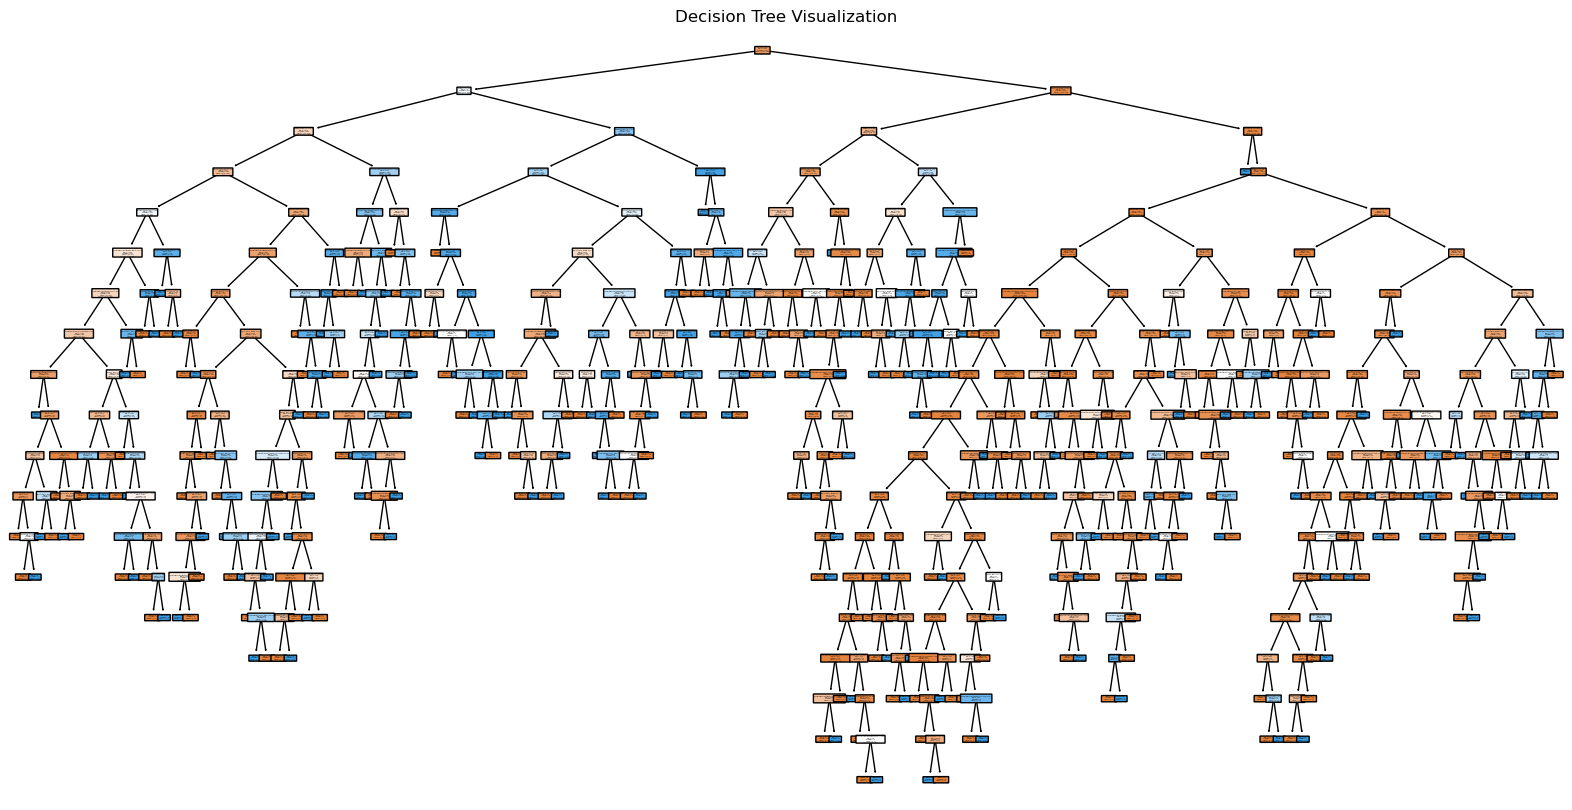

In [69]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Churned', 'Churned'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [56]:
# MARKETING STRATEGY & INSIGHTS
#ANALYZING THE CHARACTERISTICS OF CUSTOMER WHO HAVE CHURNED 
churned_customers = data[data['Churn'] == 1]

In [57]:
# Observations (example insights - can be expanded further) 
# For instance, churned customers may have lower tenure, higher order amount hike, etc.
print("Churned Customers Characteristics:")
print(churned_customers.describe())

Churned Customers Characteristics:
                CustomerID                Churn               Tenure  \
count               948.00               948.00               948.00   
mean             52,746.58                 1.00                 3.96   
std               1,637.49                 0.00                 5.58   
min              50,001.00                 1.00                 0.00   
25%              51,343.75                 1.00                 0.00   
50%              52,811.50                 1.00                 1.00   
75%              54,154.25                 1.00                 7.00   
max              55,622.00                 1.00                21.00   

                  CityTier      WarehouseToHome       HourSpendOnApp  \
count               948.00               948.00               948.00   
mean                  1.83                17.00                 2.96   
std                   0.96                 8.25                 0.67   
min                   1.00  

In [58]:
# IDENTIFY HIGH-RISK CUSTOMERS WHO ARE LIKELY TO CHURN NEXT BASED ON THE FEATURES
# E.G., CUSTOMERS WITH LOW SATISFACTION, LOW ORDER COUNT, AND HIGH TENURE MIGHT BE AT RISK
# CREATE A SAMPLE HIGH-RISK GROUP BASED ON INSIGHTS (EXAMPLE THRESHOLD CRITERIA)
high_risk_customers = data[(data['SatisfactionScore'] < 3) & (data['OrderCount'] < 2) & (data['Tenure'] > 6)]


In [61]:
# PRESENT HIGH-RISK CUSTOMERS AND DEVISE A STRATEGY TO REDUCE CHURN
print("High-Risk Customers Likely to Churn Next:")
print(high_risk_customers[['CustomerID', 'SatisfactionScore', 'OrderCount', 'Tenure']])


High-Risk Customers Likely to Churn Next:
      CustomerID  SatisfactionScore           OrderCount               Tenure
6          50007                  2                 1.00                10.19
24         50025                  2                 1.00                14.00
38         50039                  2                 1.00                30.00
43         50044                  2                 1.00                11.00
74         50075                  2                 1.00                11.00
...          ...                ...                  ...                  ...
2795       52796                  1                 1.00                 8.00
2796       52797                  1                 1.00                11.00
2798       52799                  1                 1.00                 9.00
2803       52804                  1                 1.00                 8.00
2810       52811                  1                 1.00                 9.00

[318 rows x 4 columns

In [76]:
# Calculate accuracy for both models
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [log_reg_accuracy, dt_accuracy]
})

# Find the best model based on accuracy
best_model = results.loc[results["Accuracy"].idxmax()]

# Print results
print("Model Performance Comparison:\n", results)
print("\nBest Model:\n", best_model)

Model Performance Comparison:
                  Model             Accuracy
0  Logistic Regression                 0.91
1        Decision Tree                 0.95

Best Model:
 Model             Decision Tree
Accuracy                   0.95
Name: 1, dtype: object


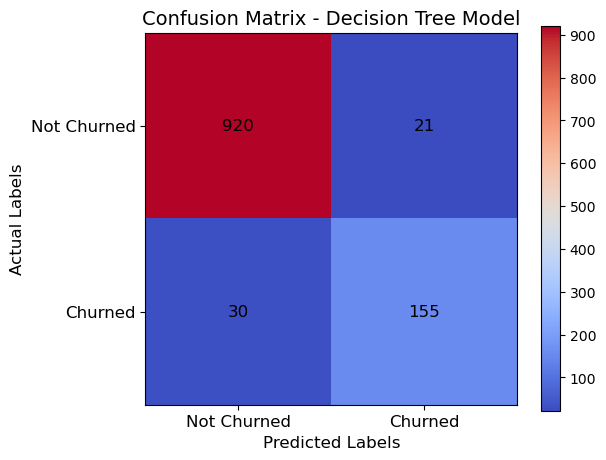

In [78]:

labels = ["Not Churned", "Churned"]
conf_matrix = np.array([[920, 21], [30, 155]])

plt.figure(figsize=(6, 5))
im = plt.imshow(conf_matrix, cmap="coolwarm")  # 'coolwarm' gives pink & blue shades

plt.xticks(np.arange(len(labels)), labels, fontsize=12)
plt.yticks(np.arange(len(labels)), labels, fontsize=12)

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)
plt.title("Confusion Matrix - Decision Tree Model", fontsize=14)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black", fontsize=12)

plt.colorbar(im)
plt.show()

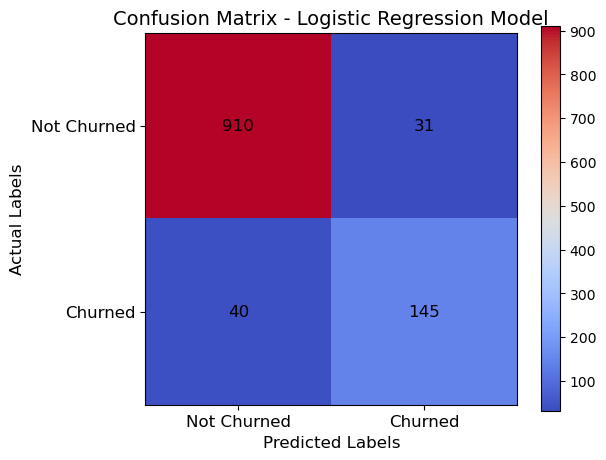

In [79]:
labels = ["Not Churned", "Churned"]
log_reg_conf_matrix = np.array([[910, 31], [40, 145]])  # Replace with actual confusion matrix values

plt.figure(figsize=(6, 5))
im = plt.imshow(log_reg_conf_matrix, cmap="coolwarm")  # 'coolwarm' applies pink & blue shades

plt.xticks(np.arange(len(labels)), labels, fontsize=12)
plt.yticks(np.arange(len(labels)), labels, fontsize=12)

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("Actual Labels", fontsize=12)
plt.title("Confusion Matrix - Logistic Regression Model", fontsize=14)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, log_reg_conf_matrix[i, j], ha="center", va="center", color="black", fontsize=12)

plt.colorbar(im)
plt.show()